In [1]:
import numpy as np
import itk
import matplotlib.pyplot as plt

In [40]:
tubevol = itk.imread("/d/data/VesselImages/HeadMRA/Aylward-M1-S2-Identity.mha")
tubevol = itk.imread("/d/tubetk/build64/ExternalData/data_keys/Branch.n010.mha")
#tubevol = itk.CastImageFilter[itk.Image[itk.SS, 3], itk.Image[itk.F, 3]].New()(tubevol)


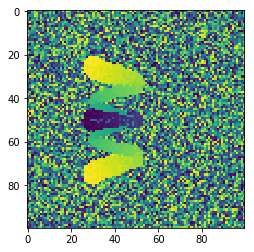

dtype('int16')

In [47]:
v = itk.GetArrayFromImage(tubevol)
j = 0
plt.imshow(np.argmax(v, j))
plt.show()
v.dtype

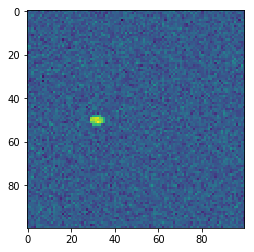

In [48]:
plt.imshow(v[30])
plt.show()

In [43]:
import itk
def scale_for_image(components):
    return np.array(255. * (components - np.min(components)) / (np.max(components) - np.min(components)), dtype=np.uint8)

def writeVolume(nparray, name):
    ImageType = itk.Image[itk.UC, 3]
    ReaderType = itk.ImageFileReader[ImageType]
    buff = itk.BridgeNumPy.PyBuffer[ImageType]
    x = scale_for_image(nparray).copy() # necessary to store x in a named variable so it isn't deleted, since Im will be a view
    Im = buff.GetImageFromArray(x)
    Im.Update()
    #print Im
    WriterType = itk.ImageFileWriter[ImageType]
    writer = WriterType.New()
    writer.SetInput(Im)
    writer.SetFileName(name)
    writer.Update()

In [44]:
def tkshow(i):
    z = itk.GetArrayFromImage(i)
    if len(z.shape) == 2:
        plt.imshow(z)
    else:
        plt.imshow(np.max(z, 0))
        plt.colorbar()
    plt.show()

In [45]:
tuber = itk.TubeTK.SegmentTubes[itk.Image[itk.F, 3]].New()

In [46]:

tuber.SetInputImage(tubevol)


TypeError: in method 'tubeSegmentTubesIF3_SetInputImage', argument 2 of type 'itkImageF3 *'

In [9]:
atube = tuber.ExtractTube([264, 176, 28], 0, True)
#atube = tuber.ExtractTube([30, 50, 30], 0, True)
tuber.AddTube(atube)

True

In [10]:
7

7

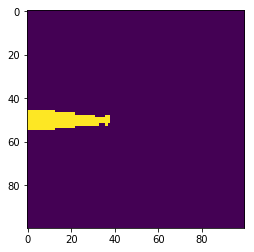

In [12]:
out = np.zeros(tubevol.GetLargestPossibleRegion().GetSize())
for i in range(out.shape[0]):
    for j in range(out.shape[1]):
        for k in range(out.shape[2]):
            out[i, j, k] = atube.Evaluate([i, j, k])
plt.imshow(np.max(out, 0))
plt.show()

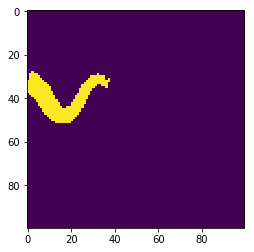

In [14]:
plt.imshow(np.max(out, 1))
plt.show()

In [11]:
flyer = itk.TubeTK.ComputeTubeFlyThroughImage[itk.F, 3].New()

In [12]:
flyer.SetInput(tuber.GetTubeGroup())
flyer.SetInputImage(tubevol)
flyer.SetTubeId(atube.GetId())
flyer.Update()

x = flyer.GetOutput()

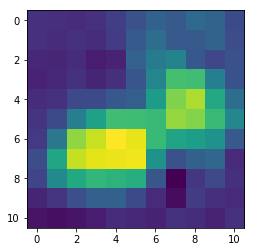

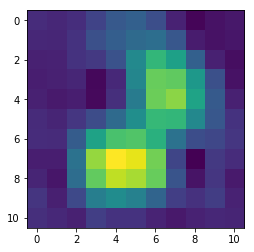

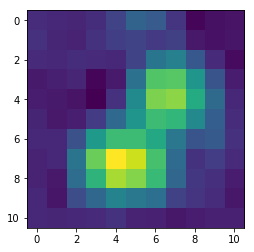

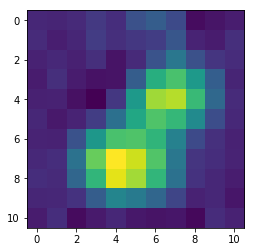

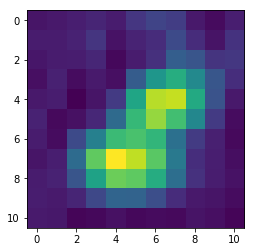

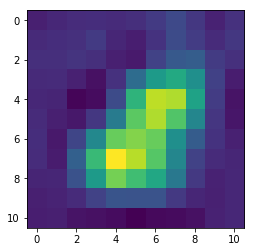

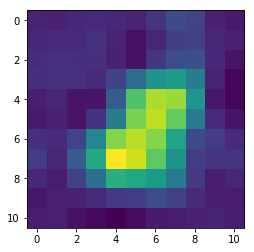

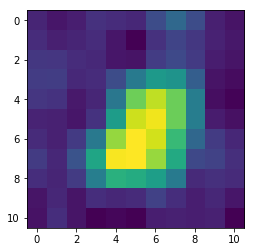

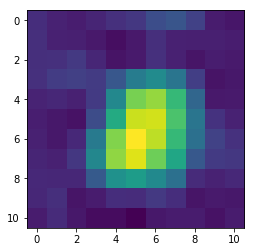

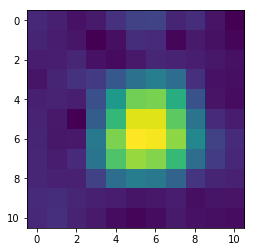

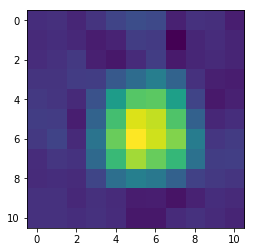

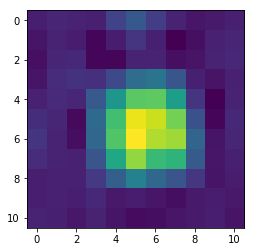

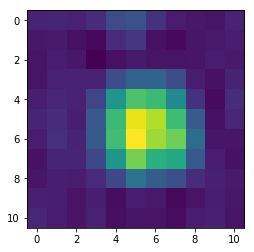

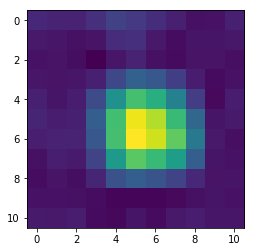

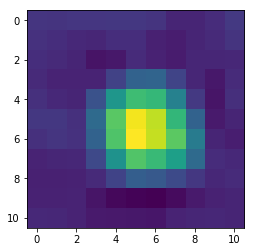

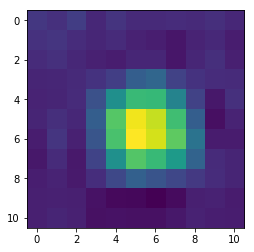

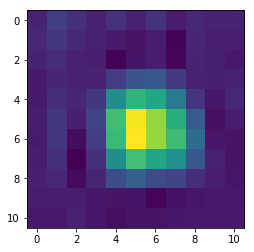

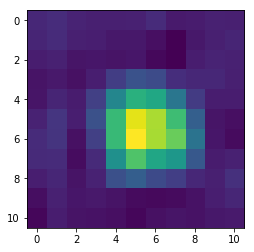

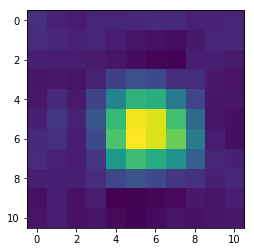

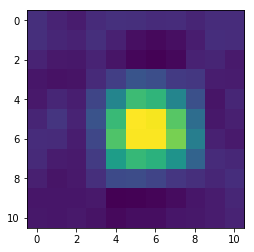

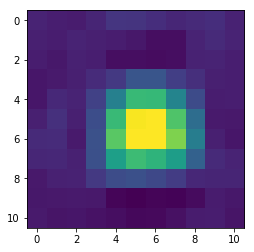

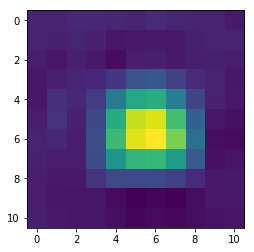

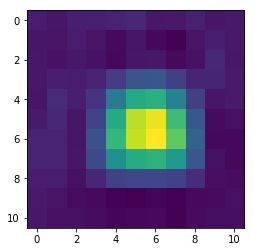

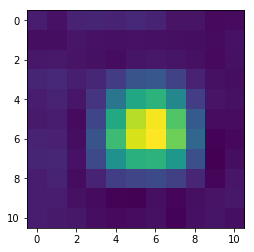

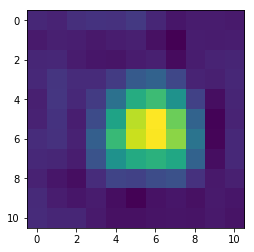

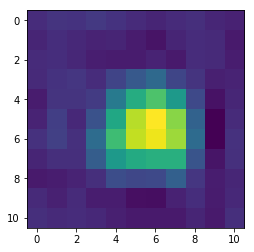

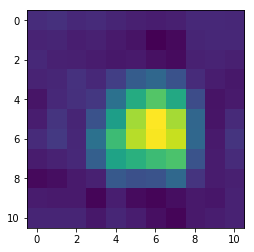

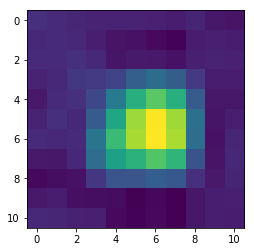

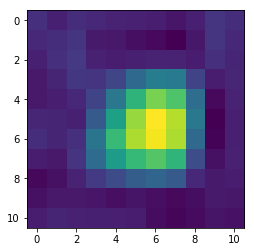

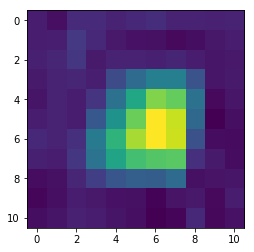

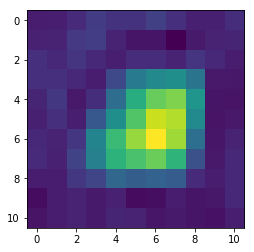

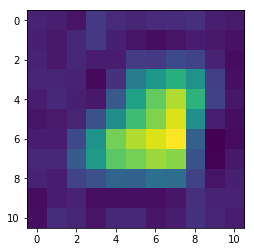

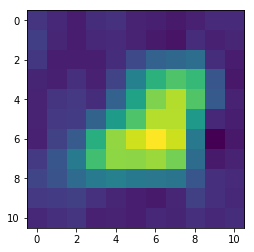

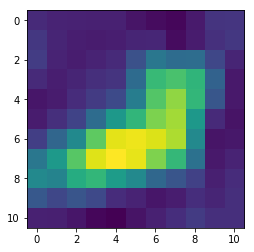

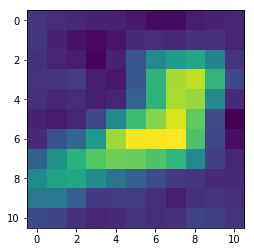

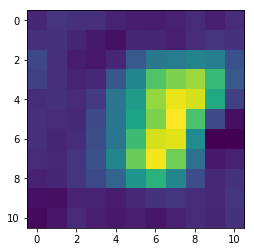

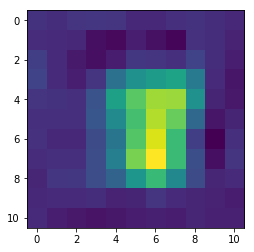

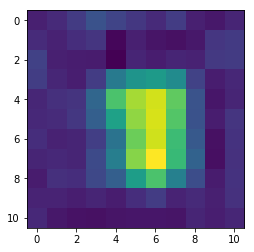

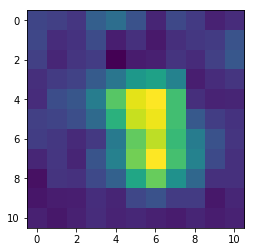

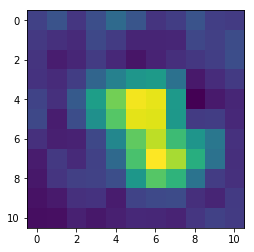

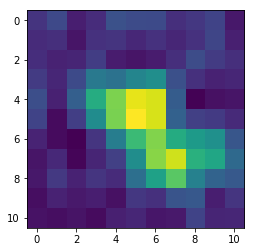

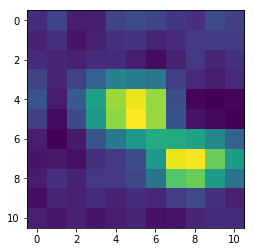

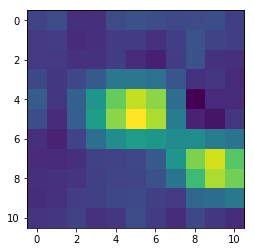

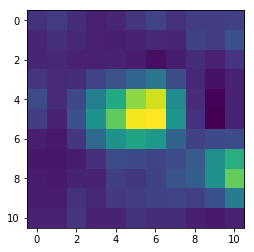

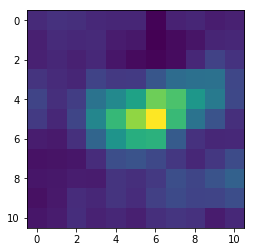

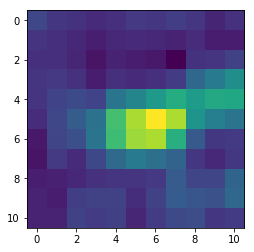

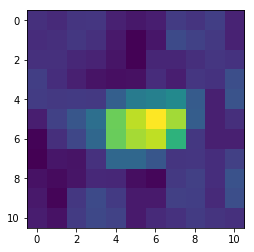

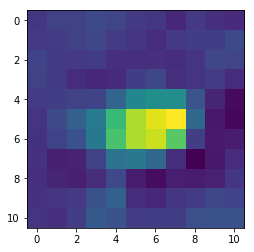

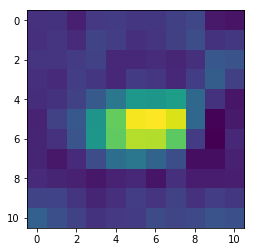

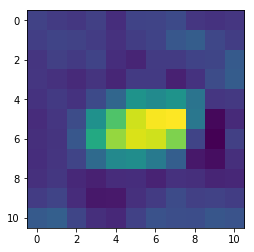

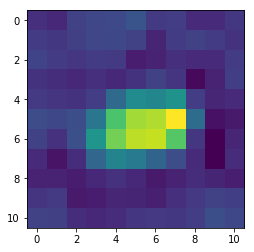

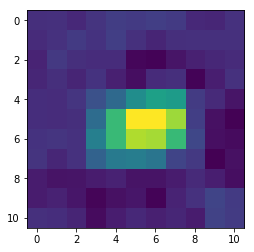

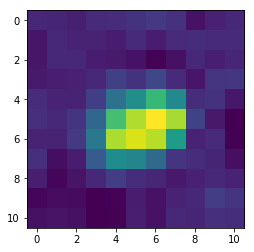

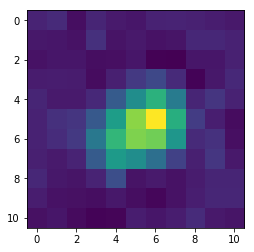

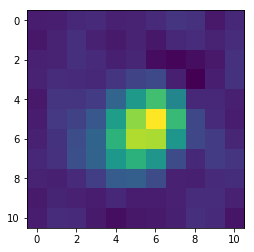

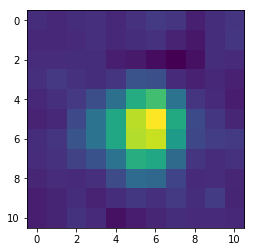

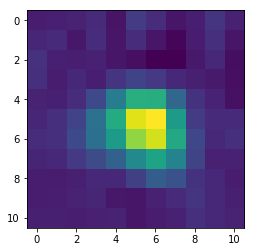

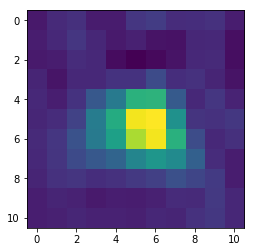

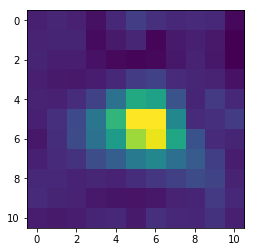

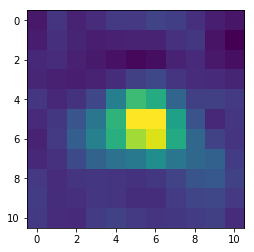

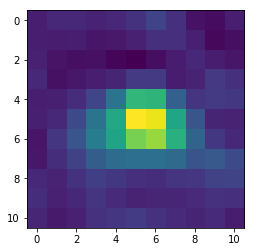

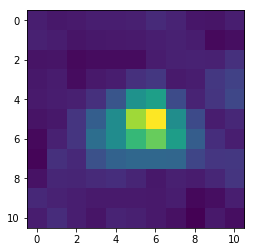

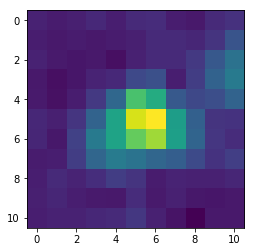

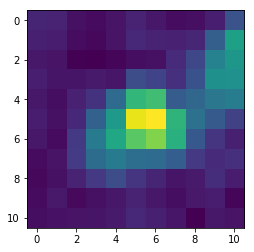

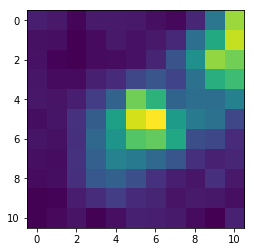

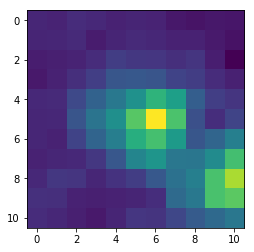

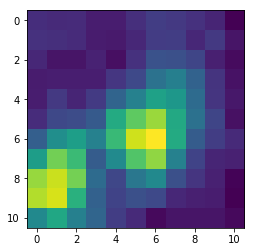

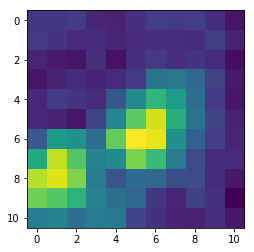

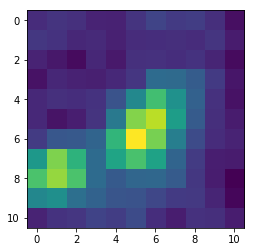

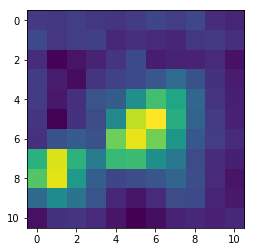

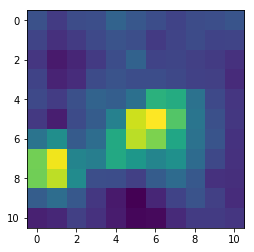

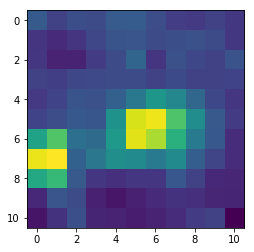

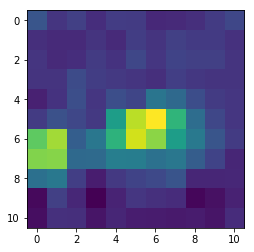

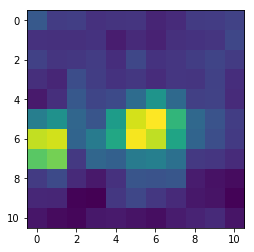

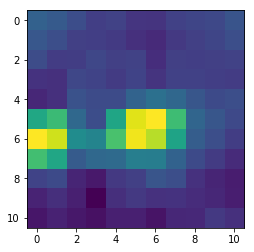

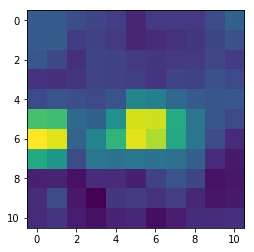

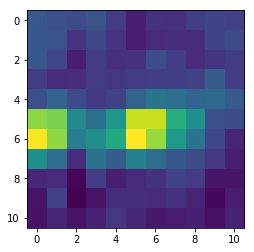

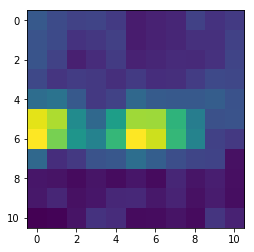

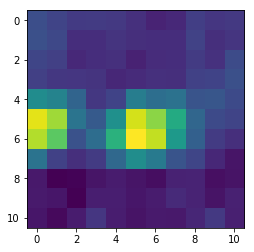

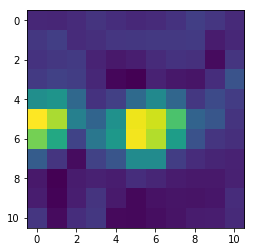

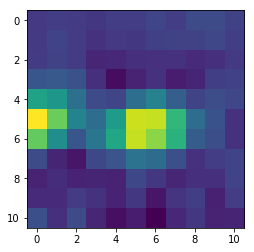

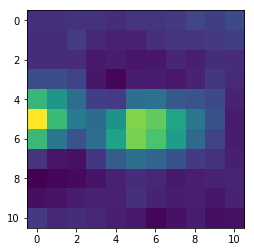

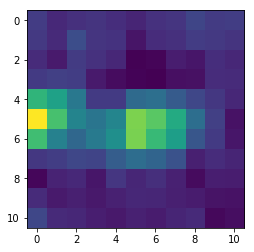

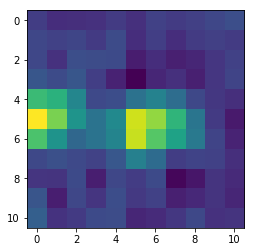

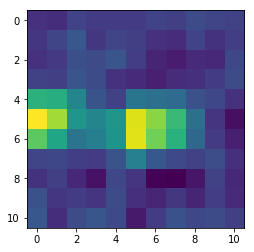

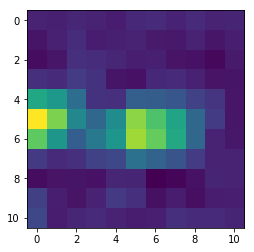

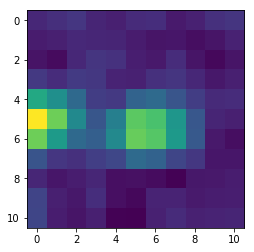

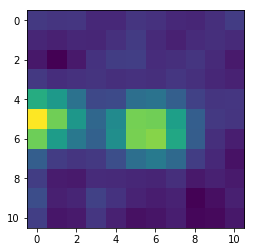

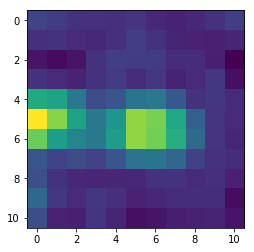

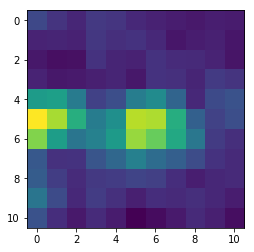

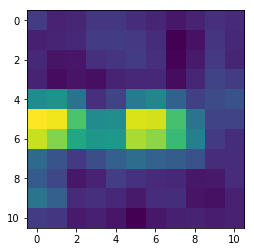

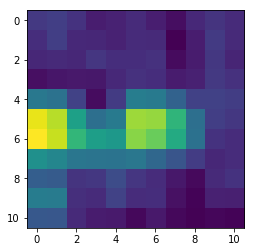

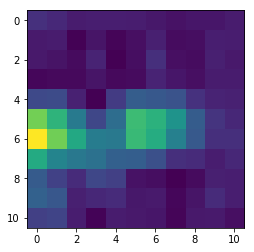

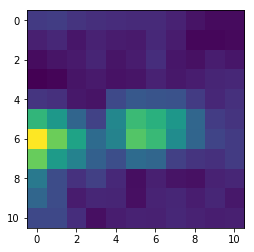

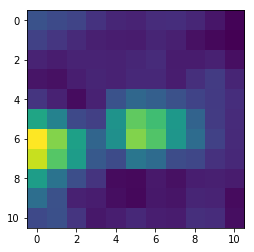

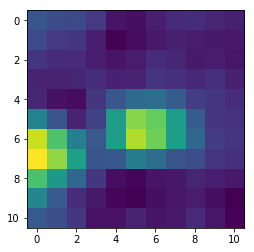

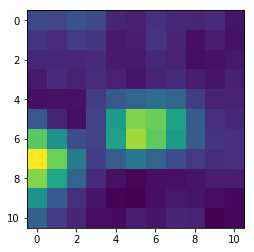

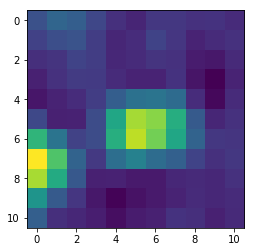

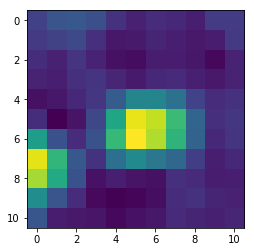

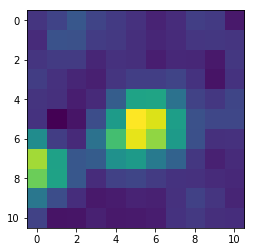

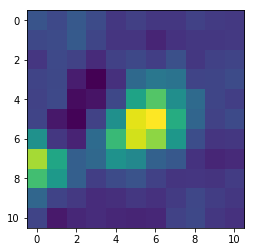

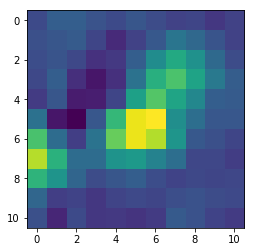

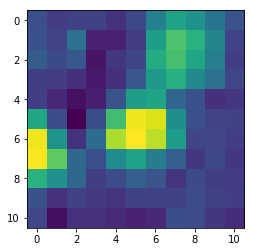

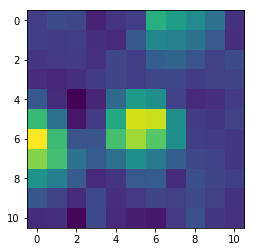

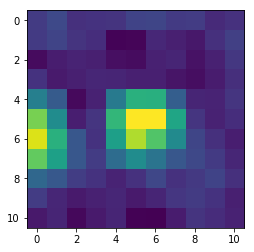

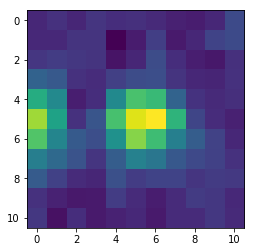

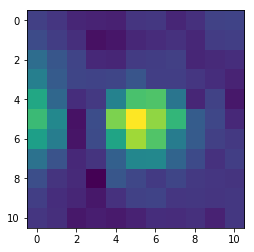

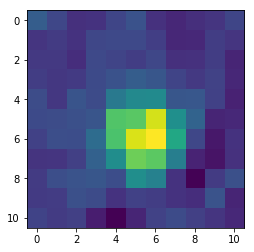

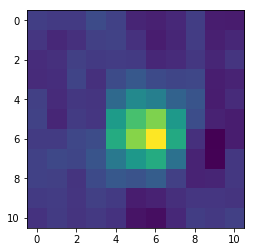

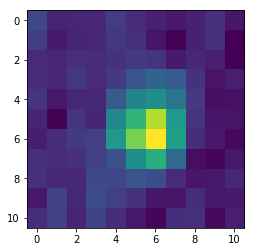

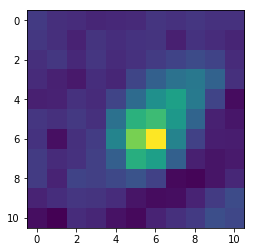

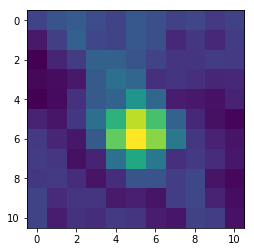

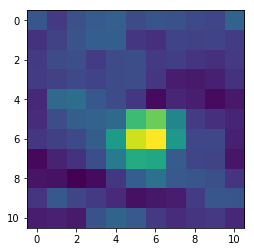

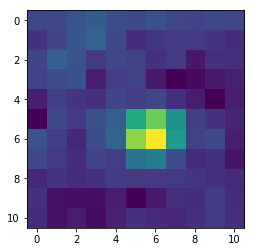

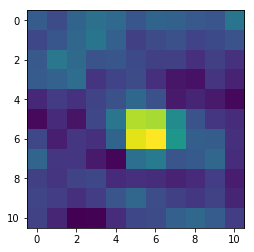

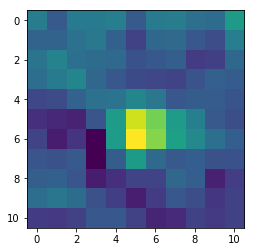

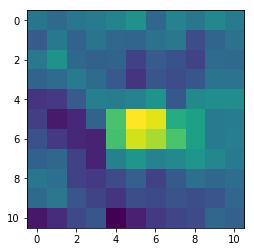

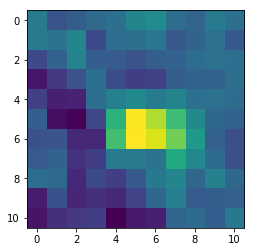

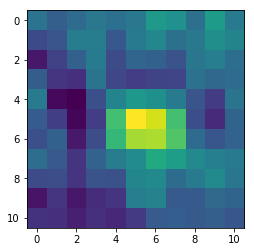

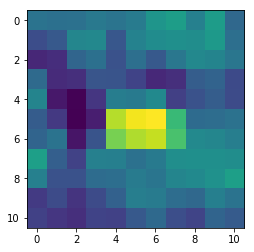

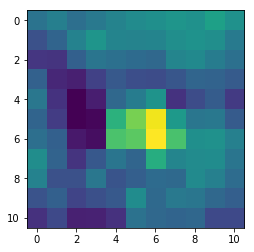

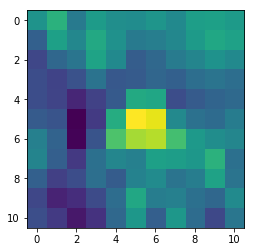

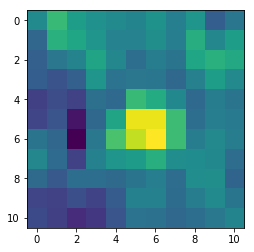

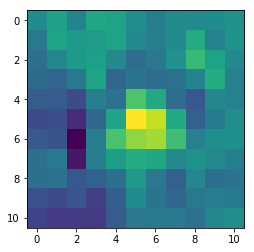

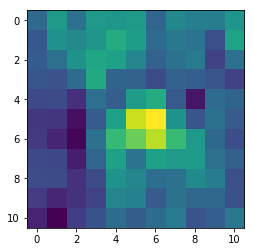

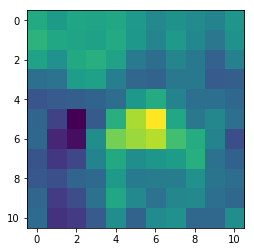

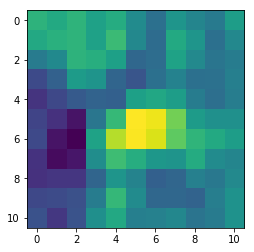

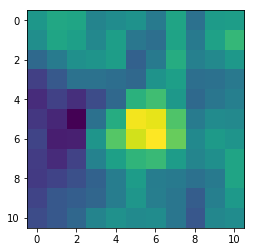

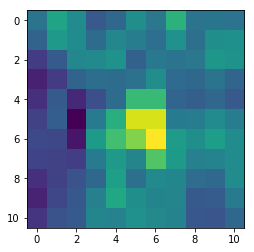

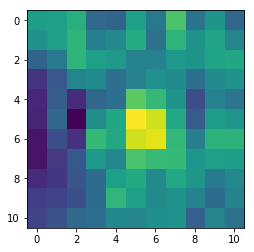

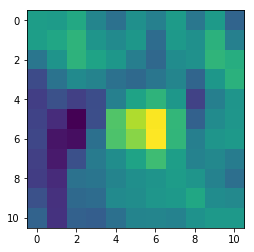

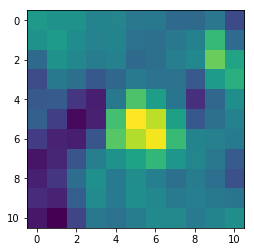

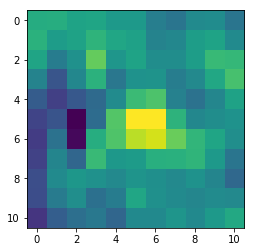

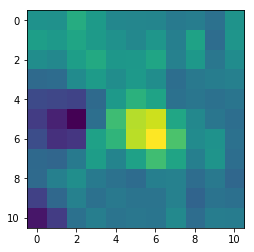

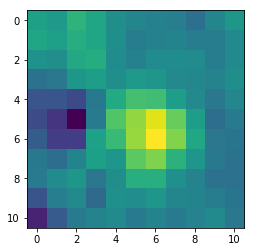

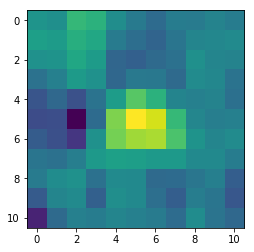

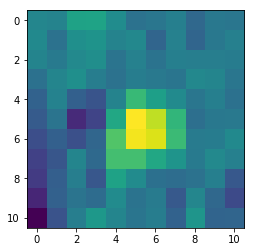

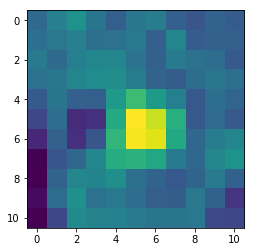

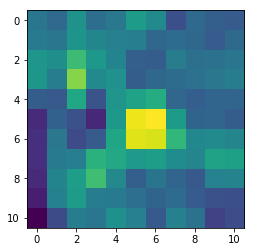

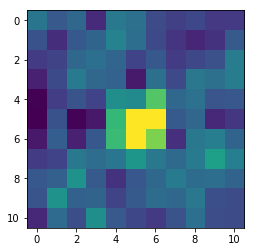

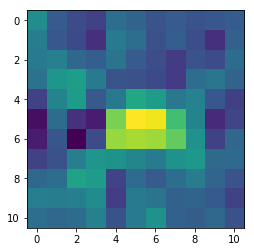

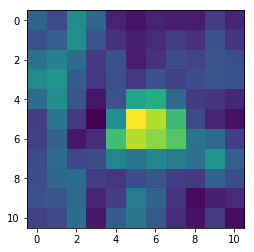

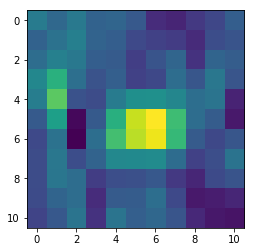

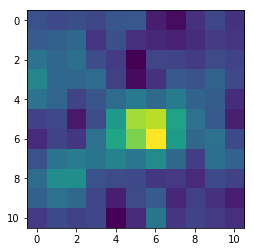

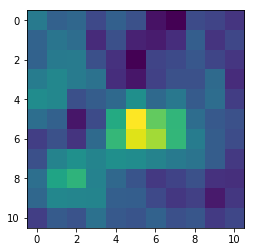

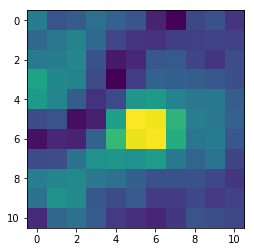

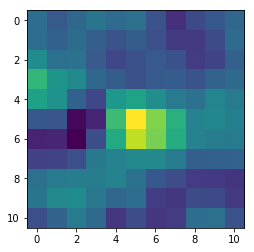

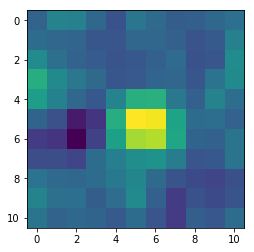

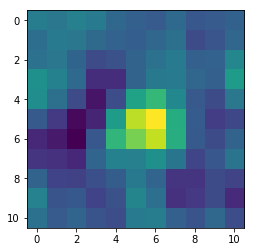

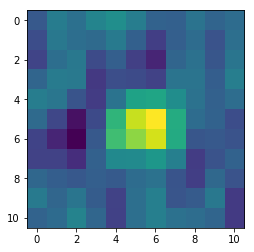

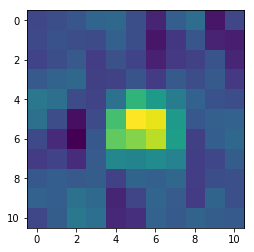

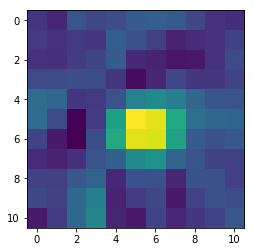

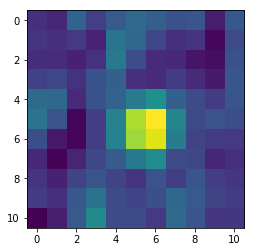

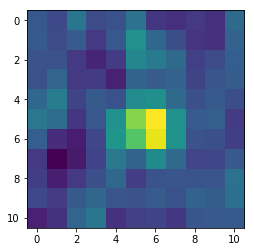

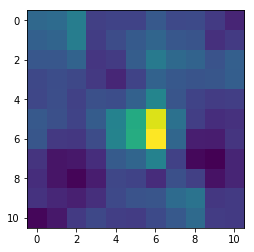

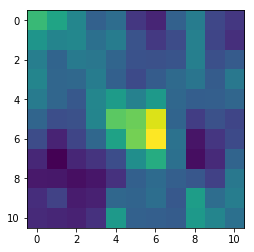

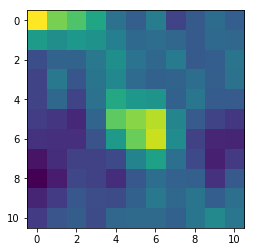

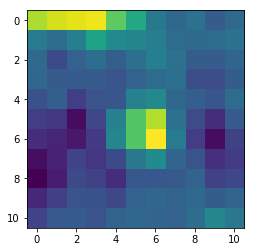

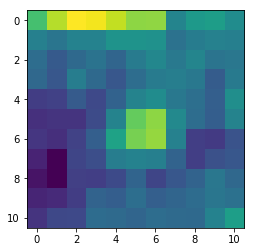

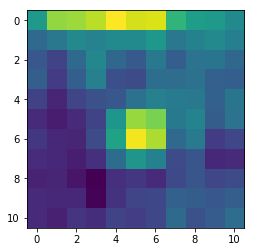

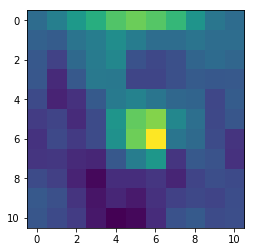

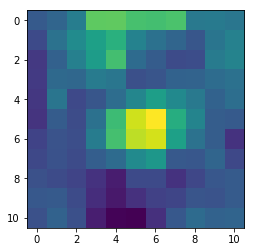

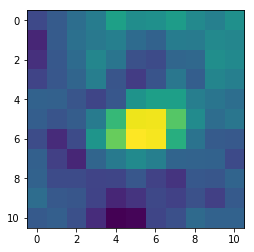

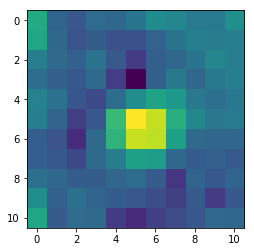

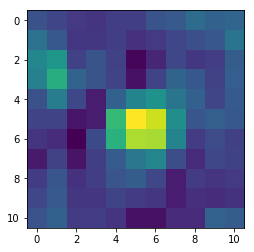

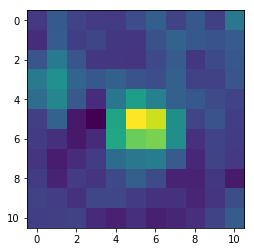

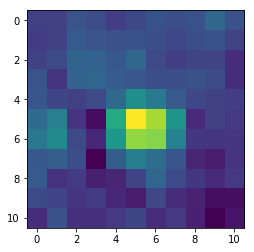

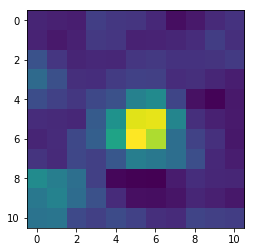

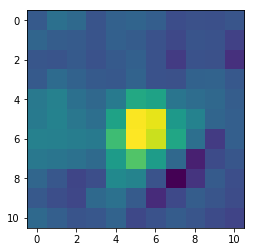

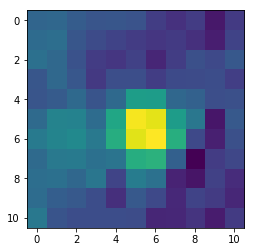

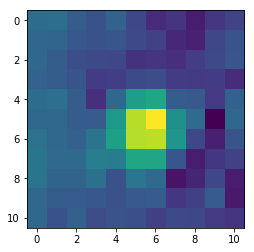

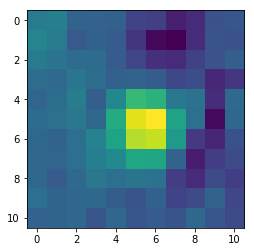

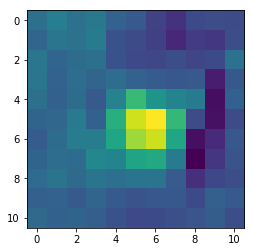

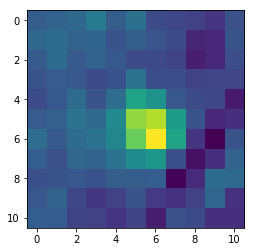

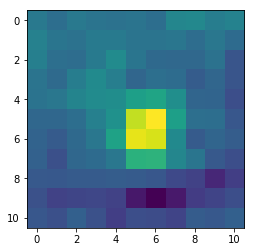

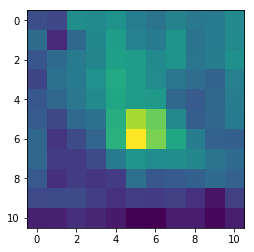

In [13]:
import cv2
xx = itk.GetArrayFromImage(x)
for sheet in xx[::10]:
    plt.imshow(sheet + 3)
    plt.show()
    

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1230: error: (-215:Assertion failed) dst.data == (uchar*)dst_ptr in function 'cvShowImage'


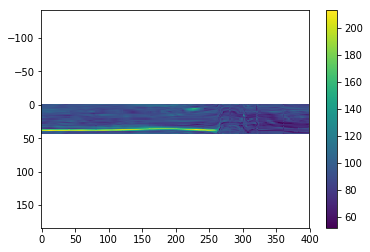

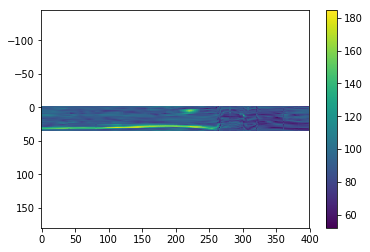

In [39]:
xy = xx[800:1200]

def outside(xy):
    return np.concatenate([xy[:, 0], xy[:, :, -1], xy[:, -1, ::-1], xy[:, ::-1, 0]], 1).transpose()

plt.imshow(outside(xy))    
plt.axis("equal")
plt.colorbar()
plt.show()
l = 1
plt.imshow(outside(xy[:, l:-l, l:-l]))    
plt.axis("equal")
plt.colorbar()
plt.show()

In [34]:
o = outside(xy)
xx.shape

(1760, 11, 11)

In [60]:
tube_py = []

def itk_pos_to_array(itkpos):
    return [itkpos.GetElement(i) for i in range(3)]

def spatial_object_pt_to_radius(pt):
    #forgive me
    return float(str(pt).split("R: ")[1].split("\n")[0])

for j in range(atube.GetNumberOfPoints()):
    pt = atube.GetPoint(j)
    pos = itk_pos_to_array(pt.GetPosition())
    radius = spatial_object_pt_to_radius(pt)
    tube_py.append({'point': pos, 'radius': radius},)
print(tube_py)

[{'point': [32.0871347391175, 50.024988251713495, 0.08957202842820838], 'radius': 4.49135}, {'point': [32.120276980891866, 50.02493833819421, 0.18429429254470744], 'radius': 4.51045}, {'point': [32.15559990847702, 50.024824417156864, 0.2782887231309133], 'radius': 4.52954}, {'point': [32.19283230437796, 50.024644976400616, 0.3715843394032443], 'radius': 4.54864}, {'point': [32.23086483675262, 50.0251154276221, 0.4646915926400059], 'radius': 4.56774}, {'point': [32.174700380026486, 50.02396338028009, 0.6103803234597387], 'radius': 4.58684}, {'point': [32.215592055859275, 50.02376761989131, 0.7022152484117781], 'radius': 4.58365}, {'point': [32.257900495076676, 50.02348596823333, 0.7933627906903076], 'radius': 4.58046}, {'point': [32.30160206736511, 50.023117189869545, 0.883792266787408], 'radius': 4.57727}, {'point': [32.35231603355282, 50.02268699066392, 0.9699991828620428], 'radius': 4.57408}, {'point': [32.39881997072933, 50.02218394963495, 1.059093423497281], 'radius': 4.5709}, {'po

In [ ]:
try:
            print ("otsu_segment")
            throw("horse")
            itk_image = helper.vtkjs_to_itk_image(image)
            
            otsu_filter = itk.TubeTK.SegmentUsingOtsuThreshold[helper.itk_pixel_type(itk_image), 
                                                  helper.itk_image_dimension(itk_image), 
                                                  helper.itk_pixel_type(itk_image)].New()
            otsu_filter.SetInput(itk_image)
            otsu_filter.Update()

            result = otsu_filter.GetOutput()

            # TODO auto-serialize in objdir_wrap?
            return helper.itk_to_vtkjs_image(result)
        except e:
            print(e)